In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from matplotlib import pyplot as plt

In [17]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [18]:
X_train.shape

(50000, 32, 32, 3)

In [19]:
X_test.shape

(10000, 32, 32, 3)

In [20]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

### Data reshape and exploration

In [21]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [22]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [39]:
def show_plot(x,index):
    plt.figure(figsize= (3,3))
    plt.imshow(x[index])


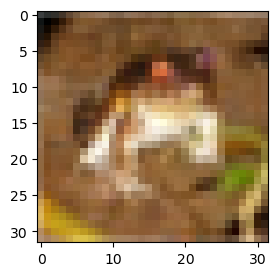

In [40]:
show_plot(X_train,0)

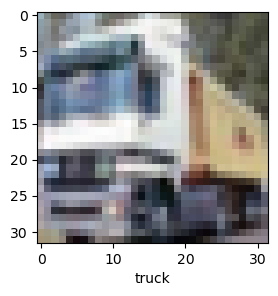

In [25]:
show_plot(X_train,y_train,1)

### Building Artificial Neural Network


In [26]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(100, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])
ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 10.2466 - accuracy: 0.2045
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.4856 - accuracy: 0.2081
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3501 - accuracy: 0.1234
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3018 - accuracy: 0.0996
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3028 - accuracy: 0.0992


In [27]:
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns
y_predicted = ann.predict(X_test)
y_predicted_classes = [np.argmax(element) for element in y_predicted]

print("Classification Report: \n", classification_report(y_test, y_predicted_classes))


313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.10      1.00      0.18      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



c:\Users\shiva\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shiva\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\shiva\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Building a convolutional neural network

In [28]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [29]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [30]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 31s 19ms/step - loss: 1.9122 - accuracy: 0.3850
Epoch 2/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.3288 - accuracy: 0.5267
Epoch 3/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1732 - accuracy: 0.5877
Epoch 4/5
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0579 - accuracy: 0.6322
Epoch 5/5
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9715 - accuracy: 0.6631


In [31]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.1151 - accuracy: 0.6158


[1.1150623559951782, 0.6158000230789185]

In [32]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[5.61072584e-03, 5.01824450e-03, 1.27228666e-02, 8.20428371e-01,
        7.23260781e-03, 6.86791688e-02, 2.89916713e-02, 5.79828862e-03,
        1.92826968e-02, 2.62352340e-02],
       [1.71252638e-02, 1.04733719e-03, 9.12565974e-06, 5.09138886e-07,
        8.64316796e-09, 8.30614244e-09, 2.01604455e-10, 1.20748755e-09,
        9.81610060e-01, 2.07648744e-04],
       [5.73110282e-02, 6.95190728e-02, 8.91585089e-03, 5.66955144e-03,
        1.22672296e-03, 5.82200417e-04, 3.91705835e-04, 5.22680231e-04,
        8.12254369e-01, 4.36068363e-02],
       [6.72741473e-01, 4.67961915e-02, 1.37464881e-01, 1.35810245e-02,
        1.65454217e-03, 2.76323431e-03, 6.13642798e-04, 1.90805225e-03,
        7.81117305e-02, 4.43652049e-02],
       [6.43503969e-04, 1.47113446e-04, 3.32737714e-02, 5.81202507e-02,
        7.78491795e-01, 1.87689085e-02, 1.05866849e-01, 4.18458786e-03,
        1.77456066e-04, 3.25846777e-04]], dtype=float32)

In [33]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [34]:
y_test[:5]


array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

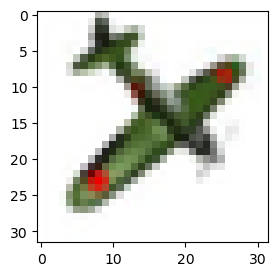

In [41]:
show_plot(X_test,98)

In [42]:
classes[y_classes[98]]


'airplane'